# TensorFlow 2.0 간단 사용법 익히기

In [1]:
import numpy as np
import tensorflow as tf

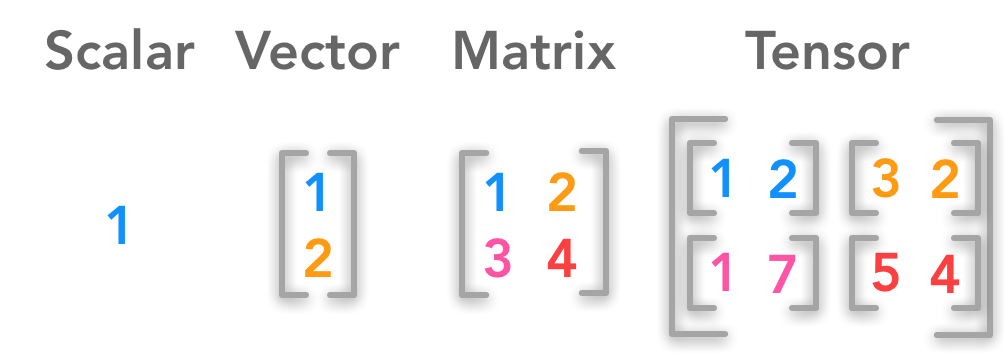

# Tensor 생성

In [2]:
# TF 안에서 numpy 의 Array 많이 사용
# ex) 이미지데이터 --> Array 변환 --> TF 에 넣어주기

#### List 생성

In [3]:
[1, 2, 3]

[1, 2, 3]

In [4]:
[[1, 2, 3], [4, 5, 6]]

[[1, 2, 3], [4, 5, 6]]

#### Array 생성

In [7]:
arr = np.array([1, 2, 3])
arr

array([1, 2, 3])

In [8]:
arr.shape

(3,)

In [10]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [11]:
arr.shape

(2, 3)

In [13]:
arr = np.array(((1, 2, 3), (4, 5, 6)))
arr

array([[1, 2, 3],
       [4, 5, 6]])

## tf.constant()
- list -> Tensor

In [14]:
tf.constant([1, 2, 3])  # 1차원 Tensor 생성

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3])>

- tuple -> Tensor

In [15]:
tf.constant(((1, 2, 3),(4, 5, 6)))  # 2차원  Tensor 생성

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [16]:
# 일반적으로 현업에선 list, tuple 보다는 
# Array 로 다루는게 보편적

- Array -> Tensor

In [17]:
arr = np.array([1, 2, 3])
arr

array([1, 2, 3])

In [18]:
tf.constant(arr)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3])>

## Tensor 에 담긴 정보 확인

- shape 확인

In [19]:
tensor = tf.constant(arr)
tensor

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3])>

In [21]:
tensor.shape

TensorShape([3])

In [22]:
tensor.ndim

1

In [24]:
# tensor.size  없다!

- data type 확인
    - Tensor 생성할때 data type 을 정해주지 않으면, data type 혼선 올수 있다.
    - data type 에 따라. 모델의 무게나 성능 차이에도 영향을 줄수 있슴

In [25]:
tensor.dtype

tf.int32

- data type 정의

아예 처음부터 `데이터 타입` 을 정의해주고 진행하는 것도 추천함.


In [26]:
tf.constant([1, 2, 3], dtype=tf.uint8)  # dtype 을 부호없는 1byte 정수 타입으로 지정

<tf.Tensor: shape=(3,), dtype=uint8, numpy=array([1, 2, 3], dtype=uint8)>

In [27]:
tf.constant([1, 2, 3], dtype=tf.float32)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

- data type 변환
    - Numpy 에서 astype() 으로 변환했듯이... TF 에선 tf.cast 사용하여 변환

In [28]:
arr = np.array([1, 2, 3], dtype=np.float32)
arr

array([1., 2., 3.], dtype=float32)

In [29]:
arr.astype(np.uint8)  # 원본변화 없다.

array([1, 2, 3], dtype=uint8)

In [30]:
tensor = tf.constant([1, 2, 3], dtype=tf.float32)
tensor

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [31]:
tf.cast(tensor, dtype=tf.uint8)  # 원본 변화 없다

<tf.Tensor: shape=(3,), dtype=uint8, numpy=array([1, 2, 3], dtype=uint8)>

In [32]:
tensor

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

- Tensor 에서 Numpy 불러오기
    - 방법1 : **.numpy()**

In [34]:
tensor.numpy()  # ndarray 객체 

array([1., 2., 3.], dtype=float32)

   - 방법2 : **np.array()**

In [35]:
np.array(tensor)

array([1., 2., 3.], dtype=float32)

In [36]:
type(tensor)

tensorflow.python.framework.ops.EagerTensor

In [37]:
type(tensor.numpy())

numpy.ndarray

## 난수생성

Numpy 에서도 'normal 혹은 uniform distribution' 으로 랜덤 데이터를 생성가능했다.

TensorFlow 도 uniform 혹은 normal 로 생성 가능

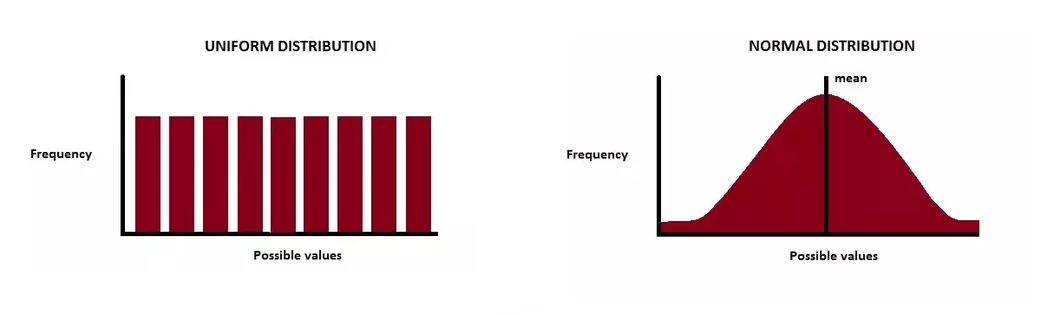

In [38]:
np.random.randn(9)

array([-1.25762025, -0.57960522,  1.04251365,  0.11343886, -0.671981  ,
       -1.04312741, -1.20246233,  0.61469872, -0.46330129])

In [135]:
np.random.normal(9)  # random.normal() 은 정규분포로부터 샘플링된 난수 리턴

9.149810369963776

In [158]:
np.random.normal([3, 3])

array([3.83152794, 2.60214672])

In [159]:
tf.random.normal([9])

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([ 0.15360671, -0.06944433, -0.48504183,  0.43504518, -1.3929995 ,
       -0.2524444 ,  0.8151232 ,  0.3216497 ,  1.5230535 ], dtype=float32)>

In [160]:
tf.random.normal([3, 3])   # 정규분포 난수, 3 x 3 2차원 Tensor

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.01083507,  0.28881034,  0.4760019 ],
       [-0.7453869 , -1.2236818 , -0.85125333],
       [ 0.65021175,  0.9750573 ,  1.3268143 ]], dtype=float32)>

In [161]:
# 균등분포 난수
tf.random.uniform([4, 4])   # [0, 1) 사이 균등분포 난수.  4 x 4  2차원 Tensor

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[0.21310878, 0.00907993, 0.57260716, 0.40969694],
       [0.6666925 , 0.7851776 , 0.7316663 , 0.9001467 ],
       [0.8788836 , 0.43624425, 0.9790305 , 0.5950644 ],
       [0.5019109 , 0.73022115, 0.4026531 , 0.5238329 ]], dtype=float32)>